<a href="https://colab.research.google.com/github/PeterG2001/Projects-/blob/main/Applied_AI_MB_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class multi_arm_bandit(object):
    def __init__(self, Action_Value, Epsilon, Total_Steps):
        self.Arm = np.size(Action_Value)
        self.Epsilon = Epsilon
        self.Current_Step = 0
        self.Particular_arm_selected = np.zeros(self.Arm)
        self.Total_Steps = Total_Steps
        self.Action_Value = Action_Value
        self.Mean_reward_of_arm = np.zeros(self.Arm)
        self.Curent_reward = 0
        self.Mean_reward = np.zeros(Total_Steps+1)
        self.Particular_arm_selected_count = np.zeros(self.Arm)


    def epsilon_greedy(self):
        Probability = np.random.rand()
        if (self.Current_Step == 0) or (Probability <= self.Epsilon):
            Arm_selected = np.random.choice(self.Arm)
        if (Probability > self.Epsilon):
            Arm_selected = np.argmax(self.Mean_reward_of_arm)
        self.Current_Step = self.Current_Step + 1
        self.Particular_arm_selected[Arm_selected] = self.Particular_arm_selected[Arm_selected]+1
        self.Particular_arm_selected_count[Arm_selected] = self.Particular_arm_selected_count[Arm_selected]+1
        self.Curent_reward = np.random.normal(self.Action_Value[Arm_selected], 1)
        self.Mean_reward[self.Current_Step] = self.Mean_reward[self.Current_Step-1]+(1/(self.Current_Step))*(self.Curent_reward-self.Mean_reward[self.Current_Step-1])
        self.Mean_reward_of_arm[Arm_selected] = self.Mean_reward_of_arm[Arm_selected]+(1/(self.Particular_arm_selected[Arm_selected]))*(self.Curent_reward-self.Mean_reward_of_arm[Arm_selected])

    def play_game(self):
        for i in range(self.Total_Steps):
            self.epsilon_greedy()

    def ClearAll(self):
        self.Current_Step = 0
        self.Particular_arm_selected = np.zeros(self.Arm)
        self.Mean_reward_of_arm = np.zeros(self.Arm)
        self.Curent_reward = 0
        self.Mean_reward = np.zeros(Total_Steps+1)
        self.Optimal_Action = np.zeros(Total_Steps+1)


    def ClearAll(self):
        self.Current_Step = 0
        self.Particular_arm_selected = np.zeros(self.Arm)
        self.Mean_reward_of_arm = np.zeros(self.Arm)
        self.Curent_reward = 0
        self.Mean_reward = np.zeros(Total_Steps+1)
        self.Optimal_Action = np.zeros(Total_Steps+1)


        Action_Value = ([5,8,12,1,3,11,9,10])
        Epsilon1 = 0
        Epsilon2 = 0.01
        Epsilon3 = 0.1
        Epsilon4 = 0.4
        Total_Steps = 10000

        Bandit1 = multi_arm_bandit(Action_Value, Epsilon1, Total_Steps)
        Bandit1.play_game()
        Epsilon1Meanreward = Bandit1.Mean_reward
        print(Bandit1.Particular_arm_selected)

        Bandit2 = multi_arm_bandit(Action_Value, Epsilon2, Total_Steps)
        Bandit2.play_game()
        Epsilon2Meanreward = Bandit2.Mean_reward
        print(Bandit2.Particular_arm_selected)

        Bandit3 = multi_arm_bandit(Action_Value, Epsilon3, Total_Steps)
        Bandit3.play_game()
        Epsilon3Meanreward = Bandit3.Mean_reward
        print(Bandit3.Particular_arm_selected)

        Bandit4 = multi_arm_bandit(Action_Value, Epsilon4, Total_Steps)
        Bandit4.play_game()
        Epsilon4Meanreward = Bandit4.Mean_reward
        print(Bandit4.Particular_arm_selected)

        plt.figure(1)
        plt.plot(np.arange(Total_Steps+1),Epsilon1Meanreward,linewidth=2, color='r', label='epsilon =0')
        plt.plot(np.arange(Total_Steps+1),Epsilon2Meanreward,linewidth=2, color='k', label='epsilon =0.01')
        plt.plot(np.arange(Total_Steps+1),Epsilon3Meanreward,linewidth=2, color='m', label='epsilon =0.1')
        plt.plot(np.arange(Total_Steps+1),Epsilon4Meanreward,linewidth=2, color='b', label='epsilon =0.4')
        plt.xscale("log")
        plt.xlabel('Steps')
        plt.ylabel('Average reward')
        plt.legend()
        plt.show()


[1000.    0.    0.    0.    0.    0.    0.    0.]
[ 43.   1. 953.   1.   1.   0.   1.   0.]
[ 13.  14. 913.  14.   7.  10.   6.  23.]
[ 67.  49. 582.  59.  49.  85.  50.  59.]


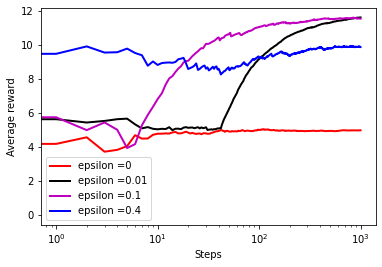

In [ ]:
# Define the parameters
Action_Value = ([5,8,12,1,3,11,9,10])
Epsilon1 = 0
Epsilon2 = 0.01
Epsilon3 = 0.1
Epsilon4 = 0.4
Total_Steps = 1000


# Create the bandits and play the game
Bandit1 = multi_arm_bandit(Action_Value, Epsilon1, Total_Steps)
Bandit1.play_game()
Epsilon1Meanreward = Bandit1.Mean_reward
print(Bandit1.Particular_arm_selected)

Bandit2 = multi_arm_bandit(Action_Value, Epsilon2, Total_Steps)
Bandit2.play_game()
Epsilon2Meanreward = Bandit2.Mean_reward
print(Bandit2.Particular_arm_selected)

Bandit3 = multi_arm_bandit(Action_Value, Epsilon3, Total_Steps)
Bandit3.play_game()
Epsilon3Meanreward = Bandit3.Mean_reward
print(Bandit3.Particular_arm_selected)

Bandit4 = multi_arm_bandit(Action_Value, Epsilon4, Total_Steps)
Bandit4.play_game()
Epsilon4Meanreward = Bandit4.Mean_reward
print(Bandit4.Particular_arm_selected)


# Plot the results
plt.figure(1)
plt.plot(np.arange(Total_Steps+1),Epsilon1Meanreward,linewidth=2, color='r', label='epsilon =0')
plt.plot(np.arange(Total_Steps+1),Epsilon2Meanreward,linewidth=2, color='k', label='epsilon =0.01')
plt.plot(np.arange(Total_Steps+1),Epsilon3Meanreward,linewidth=2, color='m', label='epsilon =0.1')
plt.plot(np.arange(Total_Steps+1),Epsilon4Meanreward,linewidth=2, color='b', label='epsilon =0.4')
plt.xscale("log")
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()